## Import data and library

In [658]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [659]:
!pip install pycaret nameparser

In [660]:
import re
import pycaret

In [661]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

## Data Exploration

In [662]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [663]:
len(df)

891

In [664]:
## How many survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [665]:
## Check passenger class
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [666]:
## Check passenger sex
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [667]:
## Check passenger silblings and spouses
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [668]:
## Check passenger parents and childrens
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:>

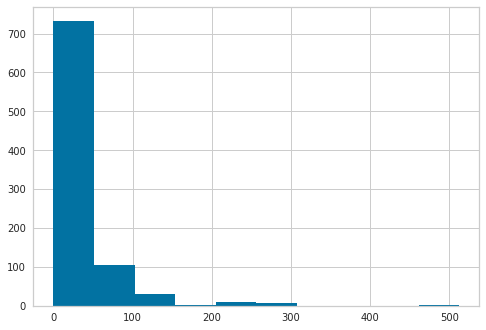

In [669]:
df['Fare'].hist()

<AxesSubplot:>

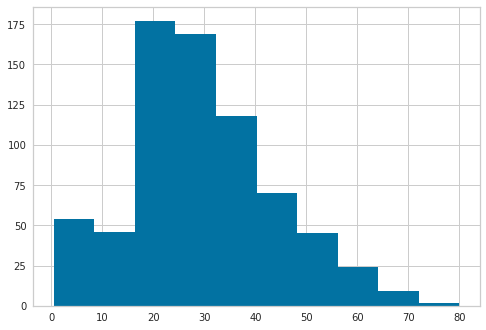

In [670]:
df['Age'].hist()

In [671]:
df['Cabin'].dropna().head(50)

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
151             C2
166            E33
170            B19
174             A7
177            C49
183             F4
185            A32
193             F2
194             B4
195            B80
205             G6
209            A31
215            D36
218            D15
224            C93
230            C83
245            C78
248            D35
251             G6
252            C87
Name: Cabin, dtype: object

In [672]:
re.search('\d+', df['Cabin'][10]).group(0)

'6'

In [673]:
re.match('^\w', df['Cabin'][10]).group(0)

'G'

In [674]:
## Explore cabin character
cabin_character = df['Cabin'].dropna().apply(lambda x: re.match('^\w', x).group(0))
cabin_character.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [675]:
## Explore cabin number
def get_cabin_number(x):
    digit_match = re.search('\d+', x)
    return digit_match.group(0) if digit_match else float('nan')

<AxesSubplot:>

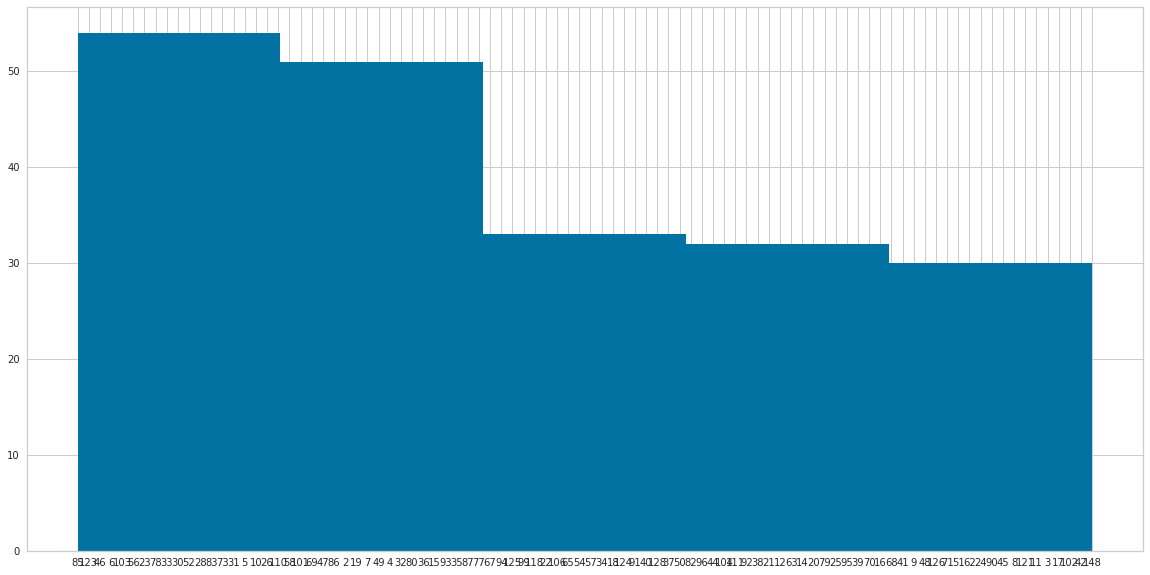

In [676]:
## Explore cabin number
cabin_number = df['Cabin'].dropna().apply(get_cabin_number)
cabin_number.hist(figsize=(20, 10), bins=5)

In [677]:
cabin_number.isna().sum()

4

In [678]:
cabin_rooms_count = df['Cabin'].dropna().apply(lambda x: len(x.split(' ')))

In [679]:
cabin_rooms_count.value_counts()

1    180
2     16
3      6
4      2
Name: Cabin, dtype: int64

In [680]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [681]:
df[df['Pclass'] == 1]['Name'].head(50)

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
11                              Bonnell, Miss. Elizabeth
23                          Sloper, Mr. William Thompson
27                        Fortune, Mr. Charles Alexander
30                              Uruchurtu, Don. Manuel E
31        Spencer, Mrs. William Augustus (Marie Eugenie)
34                               Meyer, Mr. Edgar Joseph
35                        Holverson, Mr. Alexander Oskar
52              Harper, Mrs. Henry Sleeper (Myna Haxtun)
54                        Ostby, Mr. Engelhart Cornelius
55                                     Woolner, Mr. Hugh
61                                   Icard, Miss. Amelie
62                           Harris, Mr. Henry Birkhardt
64                                 Stewart, Mr. Albert A
83                               Carrau, Mr. Francisco M
88                            F

In [682]:
df[df['Pclass'] == 2]['Name'].head(50)

9                    Nasser, Mrs. Nicholas (Adele Achem)
15                      Hewlett, Mrs. (Mary D Kingcome) 
17                          Williams, Mr. Charles Eugene
20                                  Fynney, Mr. Joseph J
21                                 Beesley, Mr. Lawrence
33                                 Wheadon, Mr. Edward H
41     Turpin, Mrs. William John Robert (Dorothy Ann ...
43              Laroche, Miss. Simonne Marie Anne Andree
53     Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...
56                                     Rugg, Miss. Emily
58                          West, Miss. Constance Mirium
66                          Nye, Mrs. (Elizabeth Ramell)
70                            Jenkin, Mr. Stephen Curnow
72                                  Hood, Mr. Ambrose Jr
78                         Caldwell, Master. Alden Gates
84                                   Ilett, Miss. Bertha
98                  Doling, Mrs. John T (Ada Julia Bone)
99                             

In [683]:
df[df['Pclass'] == 3]['Name'].head(50)

0                               Braund, Mr. Owen Harris
2                                Heikkinen, Miss. Laina
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                      Sandstrom, Miss. Marguerite Rut
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
16                                 Rice, Master. Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...
19                              Masselmani, Mrs. Fatima
22                          McGowan, Miss. Anna "Annie"
24                        Palsson, Miss. Torborg Danira
25    Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
26                              Emir, Mr. Farred Chehab
28                        O'Dwyer, Miss. Ellen "

## Clean data and feature engineering

In [684]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [685]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin

In [686]:
df['cabin_number'] = cabin_number.dropna().astype('float')
df['cabin_character'] = cabin_character

In [687]:
def percentile(n):
    def percentile_(x):
        x = x[~np.isnan(x)]
        return np.percentile(x, n) if len(x) != 0 else float('nan') 
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [688]:
## Validat calculation from custom percentile aggregation function
df.groupby('cabin_character').cabin_number.median()

cabin_character
A    20.0
B    50.0
C    83.0
D    29.0
E    42.0
F    33.0
G     6.0
T     NaN
Name: cabin_number, dtype: float64

In [689]:
cabin_number_by_character_percentile = df.groupby('cabin_character').cabin_number.agg([percentile(50), percentile(33), percentile(66)])
cabin_number_by_character_percentile

,percentile_50,percentile_33,percentile_66
cabin_character,,,
A,20.0,15.24,24.48
B,50.0,35.36,69.72
C,83.0,55.12,93.00
D,29.0,20.00,35.14
E,42.0,33.00,53.68
F,33.0,4.00,37.60
G,6.0,6.00,6.00
T,NaN,NaN,NaN


In [690]:
cabin_number_by_character_percentile.loc['D']

percentile_50    29.00
percentile_33    20.00
percentile_66    35.14
Name: D, dtype: float64

In [691]:
def calculate_cabin_position(row):
    cabin_no = row['cabin_number']
    if np.isnan(cabin_no):
        return 'Unknown'
    cabin_number_percentile = cabin_number_by_character_percentile.loc[row['cabin_character']]
    percentile33 = cabin_number_percentile['percentile_33']
    percentile66 = cabin_number_percentile['percentile_66']

    if cabin_no <= percentile33:
        return 'Front'
    elif cabin_no <= percentile66:
        return 'Middle'
    else:
        return 'Back'

In [692]:
df['cabin_position'] = df.apply(calculate_cabin_position, axis=1)
df['cabin_position'].value_counts()

Unknown    691
Front       73
Back        66
Middle      61
Name: cabin_position, dtype: int64

In [693]:
def calculate_cabin_alignment(x):
    if np.isnan(x): 
        return 'Unknown'
    elif x % 2 == 0:
        return 'Right'
    else:
        return 'Left'

In [694]:
df['cabin_alignment'] = df['cabin_number'].apply(calculate_cabin_alignment)
df['cabin_alignment'].value_counts()

Unknown    691
Right      108
Left        92
Name: cabin_alignment, dtype: int64

In [695]:
df['cabin_character'] = df['cabin_character'].fillna('Unknown')
df['cabin_character'].value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: cabin_character, dtype: int64

In [696]:
df = df.drop('Cabin', axis = 1)
df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             2
cabin_number       691
cabin_character      0
cabin_position       0
cabin_alignment      0
dtype: int64

### Embarked

In [697]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [698]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [699]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [700]:
df['Embarked'].isna().sum()

0

### Name

In [701]:
from nameparser import HumanName

def parse_full_name(name):
    full_name = f"{HumanName(name).first} {HumanName(name).middle} {HumanName(name).last}".strip()
    full_name = ' '.join(full_name.split())
    return full_name if full_name != '' else 'Unknown'

In [702]:
full_name = df['Name'].apply(parse_full_name)
full_name

0            Owen Harris Braund
1          John Bradley Cumings
2               Laina Heikkinen
3        Jacques Heath Futrelle
4           William Henry Allen
                 ...           
886             Juozas Montvila
887       Margaret Edith Graham
888    Catherine Helen Johnston
889            Karl Howell Behr
890              Patrick Dooley
Name: Name, Length: 891, dtype: object

In [703]:
from nameparser import HumanName

def parse_title(name):
    full_name = HumanName(name).title
    return full_name if full_name != '' else 'Unknown'

In [704]:
title = df['Name'].apply(parse_title)

In [705]:
title.value_counts()

Mr.                 517
Miss.               182
Mrs.                125
Master.              40
Dr.                   7
Rev.                  6
Unknown               4
Mlle.                 2
Col.                  2
Mme.                  1
Ms.                   1
Lady.                 1
Sir.                  1
Capt.                 1
the Countess. of      1
Name: Name, dtype: int64

In [706]:
df['title'] = title
df['full_name'] = full_name

In [707]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_number,cabin_character,cabin_position,cabin_alignment,title,full_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,Unknown,Unknown,Unknown,Mr.,Owen Harris Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,85.0,C,Middle,Left,Mrs.,John Bradley Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,Unknown,Unknown,Unknown,Miss.,Laina Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,123.0,C,Back,Left,Mrs.,Jacques Heath Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,Unknown,Unknown,Unknown,Mr.,William Henry Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,NaN,Unknown,Unknown,Unknown,Rev.,Juozas Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,42.0,B,Middle,Right,Miss.,Margaret Edith Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,NaN,Unknown,Unknown,Unknown,Miss.,Catherine Helen Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,148.0,C,Back,Right,Mr.,Karl Howell Behr


In [708]:
df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
cabin_number       691
cabin_character      0
cabin_position       0
cabin_alignment      0
title                0
full_name            0
dtype: int64

### Ticket

In [709]:
def split_ticket(x):
    return len(x.split(' '))

In [710]:
ticket_length = df['Ticket'].apply(split_ticket)

In [711]:
ticket_length

0      2
1      2
2      2
3      1
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket, Length: 891, dtype: int64

In [712]:
df['ticket_length'] = ticket_length

### Age prediction

In [713]:
df_age_prediction = df.drop(columns=['cabin_number', 'Name', 'Survived', 'PassengerId', 'Ticket', 'full_name']).dropna()

In [714]:
df_age_prediction.dtypes

Pclass               int64
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
cabin_character     object
cabin_position      object
cabin_alignment     object
title               object
ticket_length        int64
dtype: object

In [715]:
df_age_prediction.select_dtypes('object').isna().sum()

Sex                0
Embarked           0
cabin_character    0
cabin_position     0
cabin_alignment    0
title              0
dtype: int64

#### XGBoost
Note: Datawig error on example and have to downgrade pandas to 0.25 to be able to run

In [716]:
df_age_prediction_object = df_age_prediction.select_dtypes('object')

In [717]:
df_age_prediction_object.columns

Index(['Sex', 'Embarked', 'cabin_character', 'cabin_position',
       'cabin_alignment', 'title'],
      dtype='object')

In [718]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df_age_prediction_object)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [719]:
df_age_prediction_encoded = df_age_prediction.copy()

In [720]:
df_age_prediction_encoded[df_age_prediction_object.columns] = enc.transform(df_age_prediction_object)

In [721]:
df_age_prediction_encoded

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_character,cabin_position,cabin_alignment,title,ticket_length
0,3,1.0,22.0,1,0,7.2500,2.0,8.0,3.0,2.0,8.0,2
1,1,0.0,38.0,1,0,71.2833,0.0,2.0,2.0,0.0,9.0,2
2,3,0.0,26.0,0,0,7.9250,2.0,8.0,3.0,2.0,5.0,2
3,1,0.0,35.0,1,0,53.1000,2.0,2.0,0.0,0.0,9.0,1
4,3,1.0,35.0,0,0,8.0500,2.0,8.0,3.0,2.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,0.0,39.0,0,5,29.1250,1.0,8.0,3.0,2.0,9.0,1
886,2,1.0,27.0,0,0,13.0000,2.0,8.0,3.0,2.0,11.0,1
887,1,0.0,19.0,0,0,30.0000,2.0,1.0,2.0,1.0,5.0,1
889,1,1.0,26.0,0,0,30.0000,0.0,2.0,0.0,1.0,8.0,1


In [722]:
age_X = df_age_prediction_encoded.drop('Age', axis = 1)
age_Y = df_age_prediction_encoded['Age']

In [723]:
age_X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,cabin_character,cabin_position,cabin_alignment,title,ticket_length
0,3,1.0,1,0,7.2500,2.0,8.0,3.0,2.0,8.0,2
1,1,0.0,1,0,71.2833,0.0,2.0,2.0,0.0,9.0,2
2,3,0.0,0,0,7.9250,2.0,8.0,3.0,2.0,5.0,2
3,1,0.0,1,0,53.1000,2.0,2.0,0.0,0.0,9.0,1
4,3,1.0,0,0,8.0500,2.0,8.0,3.0,2.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,3,0.0,0,5,29.1250,1.0,8.0,3.0,2.0,9.0,1
886,2,1.0,0,0,13.0000,2.0,8.0,3.0,2.0,11.0,1
887,1,0.0,0,0,30.0000,2.0,1.0,2.0,1.0,5.0,1
889,1,1.0,0,0,30.0000,0.0,2.0,0.0,1.0,8.0,1


In [724]:
age_Y.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [725]:
from sklearn.model_selection import train_test_split

age_X_train, age_X_test, age_Y_train, age_Y_test = train_test_split(age_X, age_Y, test_size=0.2)

In [726]:
age_X_train

,Pclass,Sex,SibSp,Parch,Fare,Embarked,cabin_character,cabin_position,cabin_alignment,title,ticket_length
212,3,1.0,0,0,7.2500,2.0,8.0,3.0,2.0,8.0,2
281,3,1.0,0,0,7.8542,2.0,8.0,3.0,2.0,8.0,1
190,2,0.0,0,0,13.0000,2.0,8.0,3.0,2.0,9.0,1
860,3,1.0,2,0,14.1083,2.0,8.0,3.0,2.0,8.0,1
204,3,1.0,0,0,8.0500,2.0,8.0,3.0,2.0,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...
124,1,1.0,0,1,77.2875,2.0,3.0,2.0,1.0,8.0,1
400,3,1.0,0,0,7.9250,2.0,8.0,3.0,2.0,8.0,3
479,3,0.0,0,1,12.2875,2.0,8.0,3.0,2.0,5.0,1
455,3,1.0,0,0,7.8958,0.0,8.0,3.0,2.0,8.0,1


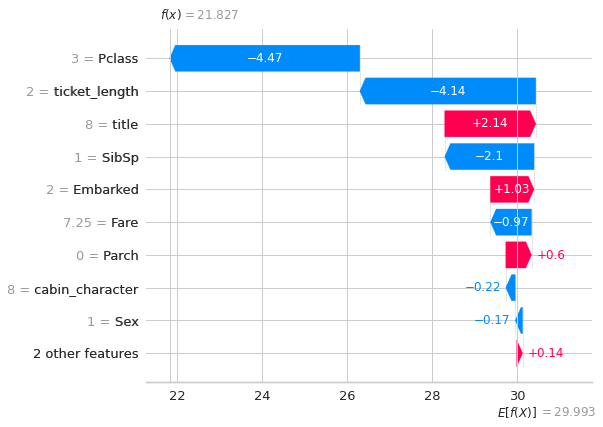

In [727]:
import xgboost
import shap

# train an XGBoost model
model = xgboost.XGBRegressor().fit(age_X_train, age_Y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(age_X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [728]:
from sklearn.metrics import mean_squared_error

y_pred_train = model.predict(age_X_train)
y_pred_test = model.predict(age_X_test)

In [729]:
 mean_squared_error(age_Y_train, y_pred_train)

33.32649746985285

In [730]:
 mean_squared_error(age_Y_test, y_pred_test)

135.3446826047864

#### Random Forest

In [731]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()

In [732]:
regr.fit(age_X_train, age_Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [733]:
pred_rf_train = regr.predict(age_X_train)
pred_rf_test = regr.predict(age_X_test)

In [734]:
 mean_squared_error(age_Y_train, pred_rf_train)

44.926519982878816

In [735]:
 mean_squared_error(age_Y_test, pred_rf_test)

124.91090312164438

#### Pycaret

In [736]:
from pycaret.regression import *
reg1 = setup(df_age_prediction_encoded, target = 'Age', session_id=123, log_experiment=True, experiment_name='age1')

,Description,Value
0,session_id,123
1,Target,Age
2,Original Data,"(714, 12)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(499, 26)"


In [737]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,8.5887,121.2519,10.9336,0.3697,0.4430,0.5283,0.0540
lightgbm,Light Gradient Boosting Machine,8.4364,121.3873,10.9280,0.3691,0.4427,0.5159,0.2400
ridge,Ridge Regression,8.9287,129.2823,11.3346,0.3238,0.5043,0.7146,0.0180
br,Bayesian Ridge,8.9184,129.5202,11.3432,0.3236,0.5047,0.7253,0.0200
lr,Linear Regression,8.9421,129.6766,11.3529,0.3215,0.5117,0.7143,0.8580
catboost,CatBoost Regressor,8.9382,130.4944,11.3295,0.3208,0.4909,0.6037,0.9820
ada,AdaBoost Regressor,9.3163,130.9408,11.4145,0.3136,0.4708,0.6295,0.0420
rf,Random Forest Regressor,9.0917,132.6064,11.4275,0.3132,0.4716,0.5679,0.3900
huber,Huber Regressor,8.8442,132.6790,11.4722,0.3086,0.4919,0.6381,0.0360
omp,Orthogonal Matching Pursuit,9.3422,143.0261,11.9266,0.2531,0.5627,0.8933,0.0160


In [738]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.9672,104.7434,10.2344,0.3856,0.4590,0.5796
1,8.5580,120.7341,10.9879,0.1942,0.4439,0.5256
2,6.8025,69.4751,8.3352,0.5582,0.3887,0.4288
3,7.7258,90.8916,9.5337,0.5584,0.4335,0.6706
4,8.2963,128.7783,11.3481,0.4634,0.4874,0.7264
5,7.6206,90.2219,9.4985,0.3461,0.5153,0.4873
6,11.0802,198.4625,14.0877,0.2155,0.4408,0.4223
7,8.3936,127.1320,11.2753,0.3923,0.3955,0.3153
8,11.1691,171.1897,13.0839,0.2099,0.5352,0.6865
9,8.4884,129.0738,11.3611,0.1417,0.3801,0.3686


In [739]:
tuned_gbr = tune_model(gbr, n_iter=50, optimize = 'MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.8927,117.1287,10.8226,0.3129,0.5927,0.9116
1,8.6342,114.8696,10.7177,0.2333,0.4955,0.7354
2,7.2812,77.6180,8.8101,0.5064,0.4442,0.5300
3,8.6427,109.1276,10.4464,0.4698,0.6172,1.3752
4,8.6692,134.1182,11.5809,0.4411,0.6456,1.3809
5,7.9962,90.9702,9.5378,0.3407,0.4606,0.5565
6,10.4575,192.6562,13.8801,0.2384,0.4530,0.5255
7,8.8258,124.7950,11.1712,0.4035,0.4215,0.4299
8,10.4481,159.8557,12.6434,0.2622,0.6396,1.1101
9,8.2109,124.6265,11.1636,0.1713,0.4072,0.4139


In [740]:
tuned_gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.2, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [741]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.2105,123.6573,11.1201,0.2747,0.4375,0.5255
1,8.6160,114.8519,10.7169,0.2334,0.4703,0.6328
2,7.2175,78.8379,8.8791,0.4986,0.3842,0.4153
3,7.9184,107.3032,10.3587,0.4787,0.4703,0.7250
4,7.4042,101.7233,10.0858,0.5761,0.4586,0.6701
5,6.6174,65.6408,8.1019,0.5243,0.5000,0.4422
6,11.0379,207.7887,14.4149,0.1786,0.4581,0.4324
7,8.4398,136.1531,11.6685,0.3492,0.3859,0.3056
8,10.8167,167.6470,12.9479,0.2262,0.5310,0.6552
9,8.5084,130.8039,11.4370,0.1302,0.3582,0.3357


In [742]:
tuned_lgbm = tune_model(lgbm, n_iter=50, optimize = 'MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.2468,124.2313,11.1459,0.2713,0.4452,0.5383
1,8.5139,113.2573,10.6422,0.2441,0.4745,0.6505
2,7.0671,75.2799,8.6764,0.5213,0.3823,0.4226
3,7.3043,87.1842,9.3372,0.5764,0.4614,0.7414
4,7.7058,108.3117,10.4073,0.5487,0.4988,0.8673
5,7.0401,75.0767,8.6647,0.4559,0.4281,0.4537
6,10.8963,198.8545,14.1016,0.2139,0.4522,0.4432
7,8.0737,122.2094,11.0548,0.4159,0.3564,0.3034
8,11.1478,172.0759,13.1178,0.2058,0.5687,0.7734
9,7.9275,119.8310,10.9467,0.2032,0.3515,0.3258


In [743]:
df_age_prediction_na = df.drop(columns=['cabin_number', 'Name', 'Survived', 'PassengerId', 'Ticket', 'full_name'])
df_age_prediction_object = df_age_prediction_na.select_dtypes('object')
df_age_prediction_na[df_age_prediction_object.columns] = enc.transform(df_age_prediction_object)
df_age_prediction_na = df_age_prediction_na[df_age_prediction_na['Age'].isna()]
df_age_prediction_na = df_age_prediction_na.drop('Age', axis = 1)

In [744]:
df_age_prediction_na

,Pclass,Sex,SibSp,Parch,Fare,Embarked,cabin_character,cabin_position,cabin_alignment,title,ticket_length
5,3,1.0,0,0,8.4583,1.0,8.0,3.0,2.0,8.0,1
17,2,1.0,0,0,13.0000,2.0,8.0,3.0,2.0,8.0,1
19,3,0.0,0,0,7.2250,0.0,8.0,3.0,2.0,9.0,1
26,3,1.0,0,0,7.2250,0.0,8.0,3.0,2.0,8.0,1
28,3,0.0,0,0,7.8792,1.0,8.0,3.0,2.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...
859,3,1.0,0,0,7.2292,0.0,8.0,3.0,2.0,8.0,1
863,3,0.0,8,2,69.5500,2.0,8.0,3.0,2.0,5.0,2
868,3,1.0,0,0,9.5000,2.0,8.0,3.0,2.0,8.0,1
878,3,1.0,0,0,7.8958,2.0,8.0,3.0,2.0,8.0,1


In [745]:
predict_age_df = predict_model(tuned_lgbm, data=df_age_prediction_na)
predict_age_df

,Pclass,Sex,SibSp,Parch,Fare,Embarked,cabin_character,cabin_position,cabin_alignment,title,ticket_length,Label
5,3,1.0,0,0,8.4583,1.0,8.0,3.0,2.0,8.0,1,29.463063
17,2,1.0,0,0,13.0000,2.0,8.0,3.0,2.0,8.0,1,30.234644
19,3,0.0,0,0,7.2250,0.0,8.0,3.0,2.0,9.0,1,26.063129
26,3,1.0,0,0,7.2250,0.0,8.0,3.0,2.0,8.0,1,24.466127
28,3,0.0,0,0,7.8792,1.0,8.0,3.0,2.0,5.0,1,22.869306
...,...,...,...,...,...,...,...,...,...,...,...,...
859,3,1.0,0,0,7.2292,0.0,8.0,3.0,2.0,8.0,1,24.466127
863,3,0.0,8,2,69.5500,2.0,8.0,3.0,2.0,5.0,2,11.267863
868,3,1.0,0,0,9.5000,2.0,8.0,3.0,2.0,8.0,1,28.748435
878,3,1.0,0,0,7.8958,2.0,8.0,3.0,2.0,8.0,1,28.751050


In [746]:
predict_age_df['Label']

5      29.463063
17     30.234644
19     26.063129
26     24.466127
28     22.869306
         ...    
859    24.466127
863    11.267863
868    28.748435
878    28.751050
888     9.054186
Name: Label, Length: 177, dtype: float64

In [749]:
df['Age'] = df["Age"].fillna(predict_age_df['Label'])

In [751]:
df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
cabin_number       691
cabin_character      0
cabin_position       0
cabin_alignment      0
title                0
full_name            0
ticket_length        0
dtype: int64

In [752]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_number,cabin_character,cabin_position,cabin_alignment,title,full_name,ticket_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,NaN,Unknown,Unknown,Unknown,Mr.,Owen Harris Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,85.0,C,Middle,Left,Mrs.,John Bradley Cumings,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,NaN,Unknown,Unknown,Unknown,Miss.,Laina Heikkinen,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,123.0,C,Back,Left,Mrs.,Jacques Heath Futrelle,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,NaN,Unknown,Unknown,Unknown,Mr.,William Henry Allen,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,NaN,Unknown,Unknown,Unknown,Rev.,Juozas Montvila,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,42.0,B,Middle,Right,Miss.,Margaret Edith Graham,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,9.054186,1,2,W./C. 6607,23.4500,S,NaN,Unknown,Unknown,Unknown,Miss.,Catherine Helen Johnston,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,148.0,C,Back,Right,Mr.,Karl Howell Behr,1


In [753]:
df_clean = df.dropna()

## Prediction

In [757]:
df_clean_predict = df_clean.drop(['Name', 'Ticket', 'full_name'], axis = 1)
# df_clean_predict

In [758]:
from pycaret.classification import *
clf1 = setup(df_clean_predict, target = 'Survived', session_id=123, log_experiment=True, experiment_name='Titanic2')

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(200, 15)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [759]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7846,0.8339,0.8711,0.8309,0.8455,0.4745,0.4819,1.4400
lda,Linear Discriminant Analysis,0.7560,0.7939,0.7878,0.8432,0.8093,0.4620,0.4726,0.0130
lr,Logistic Regression,0.7489,0.8133,0.8500,0.7952,0.8169,0.4049,0.4226,0.0940
ridge,Ridge Classifier,0.7489,0.0000,0.8089,0.8250,0.8082,0.4311,0.4538,0.0110
dt,Decision Tree Classifier,0.7418,0.6956,0.8311,0.8001,0.8120,0.3956,0.4066,0.0170
lightgbm,Light Gradient Boosting Machine,0.7346,0.7875,0.8200,0.8022,0.8059,0.3819,0.3928,0.0200
gbc,Gradient Boosting Classifier,0.7341,0.8019,0.8611,0.7721,0.8112,0.3636,0.3839,0.0580
et,Extra Trees Classifier,0.7335,0.8147,0.8189,0.7942,0.8013,0.3781,0.3914,0.2880
xgboost,Extreme Gradient Boosting,0.7198,0.8075,0.8289,0.7788,0.7998,0.3232,0.3276,5.6620
ada,Ada Boost Classifier,0.7137,0.6950,0.8178,0.7753,0.7910,0.3256,0.3366,0.0860


In [760]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.8250,0.8000,0.8889,0.8421,0.5116,0.5185
1,0.8571,0.8750,0.9000,0.9000,0.9000,0.6500,0.6500
2,0.6429,0.5000,0.9000,0.6923,0.7826,-0.1290,-0.1754
3,0.5714,0.7333,0.7778,0.6364,0.7000,-0.0244,-0.0259
4,0.8571,0.8444,0.8889,0.8889,0.8889,0.6889,0.6889
5,0.8571,0.9556,1.0000,0.8182,0.9000,0.6585,0.7006
6,0.7143,0.8000,0.7778,0.7778,0.7778,0.3778,0.3778
7,0.8571,0.9333,0.7778,1.0000,0.8750,0.7143,0.7454
8,0.8571,0.9556,1.0000,0.8182,0.9000,0.6585,0.7006
9,0.8462,0.9167,0.8889,0.8889,0.8889,0.6389,0.6389


In [761]:
tuned_lr = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8750,0.9000,0.9000,0.9000,0.6500,0.6500
1,0.7857,0.8750,0.9000,0.8182,0.8571,0.4324,0.4404
2,0.7143,0.5000,1.0000,0.7143,0.8333,0.0000,0.0000
3,0.8571,0.8889,0.8889,0.8889,0.8889,0.6889,0.6889
4,0.7143,0.7778,0.7778,0.7778,0.7778,0.3778,0.3778
5,0.8571,0.9111,1.0000,0.8182,0.9000,0.6585,0.7006
6,0.7857,0.9333,0.8889,0.8000,0.8421,0.5116,0.5185
7,0.7857,0.8222,0.7778,0.8750,0.8235,0.5532,0.5594
8,0.9286,0.9778,1.0000,0.9000,0.9474,0.8372,0.8485
9,0.8462,0.9167,0.7778,1.0000,0.8750,0.6829,0.7201


In [762]:
bagged_tuned_lr = ensemble_model(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.8750,0.8000,0.8889,0.8421,0.5116,0.5185
1,0.8571,0.8500,0.9000,0.9000,0.9000,0.6500,0.6500
2,0.6429,0.4750,0.9000,0.6923,0.7826,-0.1290,-0.1754
3,0.7143,0.8000,0.8889,0.7273,0.8000,0.3171,0.3373
4,0.7857,0.8667,0.8889,0.8000,0.8421,0.5116,0.5185
5,0.8571,0.8444,1.0000,0.8182,0.9000,0.6585,0.7006
6,0.7143,0.8222,0.7778,0.7778,0.7778,0.3778,0.3778
7,0.7143,0.8889,0.6667,0.8571,0.7500,0.4286,0.4472
8,0.8571,0.9556,1.0000,0.8182,0.9000,0.6585,0.7006
9,0.8462,0.8889,0.7778,1.0000,0.8750,0.6829,0.7201


In [763]:
boosted_tuned_lr = ensemble_model(tuned_lr, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.8750,0.8000,0.8889,0.8421,0.5116,0.5185
1,0.7857,0.8750,0.9000,0.8182,0.8571,0.4324,0.4404
2,0.6429,0.4000,0.9000,0.6923,0.7826,-0.1290,-0.1754
3,0.7143,0.7556,0.7778,0.7778,0.7778,0.3778,0.3778
4,0.7857,0.7333,0.8889,0.8000,0.8421,0.5116,0.5185
5,0.8571,0.8889,1.0000,0.8182,0.9000,0.6585,0.7006
6,0.7857,0.9111,0.8889,0.8000,0.8421,0.5116,0.5185
7,0.7857,0.8444,0.8889,0.8000,0.8421,0.5116,0.5185
8,0.8571,0.9556,1.0000,0.8182,0.9000,0.6585,0.7006
9,0.8462,0.9444,0.7778,1.0000,0.8750,0.6829,0.7201


In [766]:
df_clean_predict_train = df_clean_predict.drop('Survived', axis = 1)
predict_train = predict_model(tuned_lr, data = df_clean_predict_train)

In [767]:
predict_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_number,cabin_character,cabin_position,cabin_alignment,title,ticket_length,Label,Score
1,2,1,female,38.0,1,0,71.2833,C,85.0,C,Middle,Left,Mrs.,2,1,0.9853
3,4,1,female,35.0,1,0,53.1000,S,123.0,C,Back,Left,Mrs.,1,1,0.9863
6,7,1,male,54.0,0,0,51.8625,S,46.0,E,Middle,Right,Mr.,1,0,0.9830
10,11,3,female,4.0,1,1,16.7000,S,6.0,G,Front,Right,Miss.,2,1,0.9688
11,12,1,female,58.0,0,0,26.5500,S,103.0,C,Back,Left,Miss.,1,0,0.5432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,female,47.0,1,1,52.5542,S,35.0,D,Middle,Left,Mrs.,1,1,0.9836
872,873,1,male,33.0,0,0,5.0000,S,51.0,B,Middle,Left,Mr.,1,0,0.9729
879,880,1,female,56.0,0,1,83.1583,C,50.0,C,Front,Right,Mrs.,1,1,0.9798
887,888,1,female,19.0,0,0,30.0000,S,42.0,B,Middle,Right,Miss.,1,1,0.9777


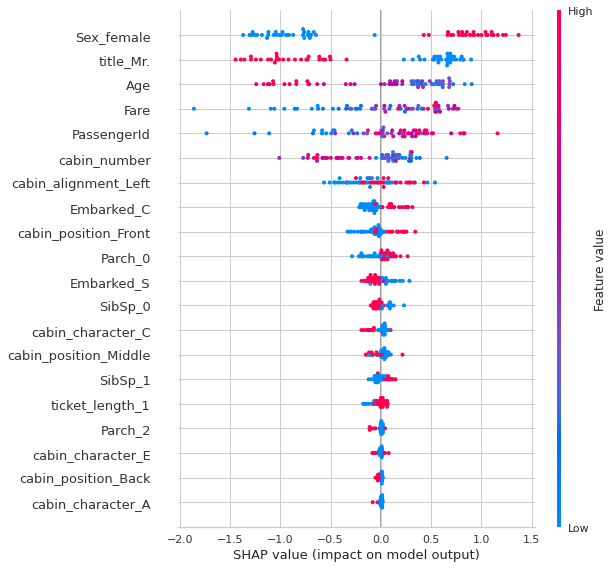

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ wa


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was depr


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and wil

In [768]:
interpret_model(tuned_lr)